- This notebook will contain the 4 datasets. 
- I will make each dataset ready to use with the best formats and relevant columns.
- after a short cleaning, I'll start to merge the files and preper them to modeling.


<p><a name="libraries"></a></p>


# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
pd.set_option('display.max_columns', 50)

def clear_cols(s):
    return s.strip().replace(" ","_")

In [3]:
inpatient   = '../Healthcare Provider Fraud Detection Analysis/Train_Inpatientdata-1542865627584.csv'
outpatient  = '../Healthcare Provider Fraud Detection Analysis/Train_Outpatientdata-1542865627584.csv'
train       = '../Healthcare Provider Fraud Detection Analysis/Train-1542865627584.csv'

# read inpatient outpatient and train files data
trainInpatient  = pd.read_csv(inpatient).rename(columns=clear_cols)
trainOutpatient = pd.read_csv(outpatient).rename(columns=clear_cols)
trainFile       = pd.read_csv(train).rename(columns=clear_cols)

<p><a name="inpatient"></a></p>

<!-- ### Inpatient -->
<center>load the <b>trainInpatient</b> file, print out the shape and column names</center>

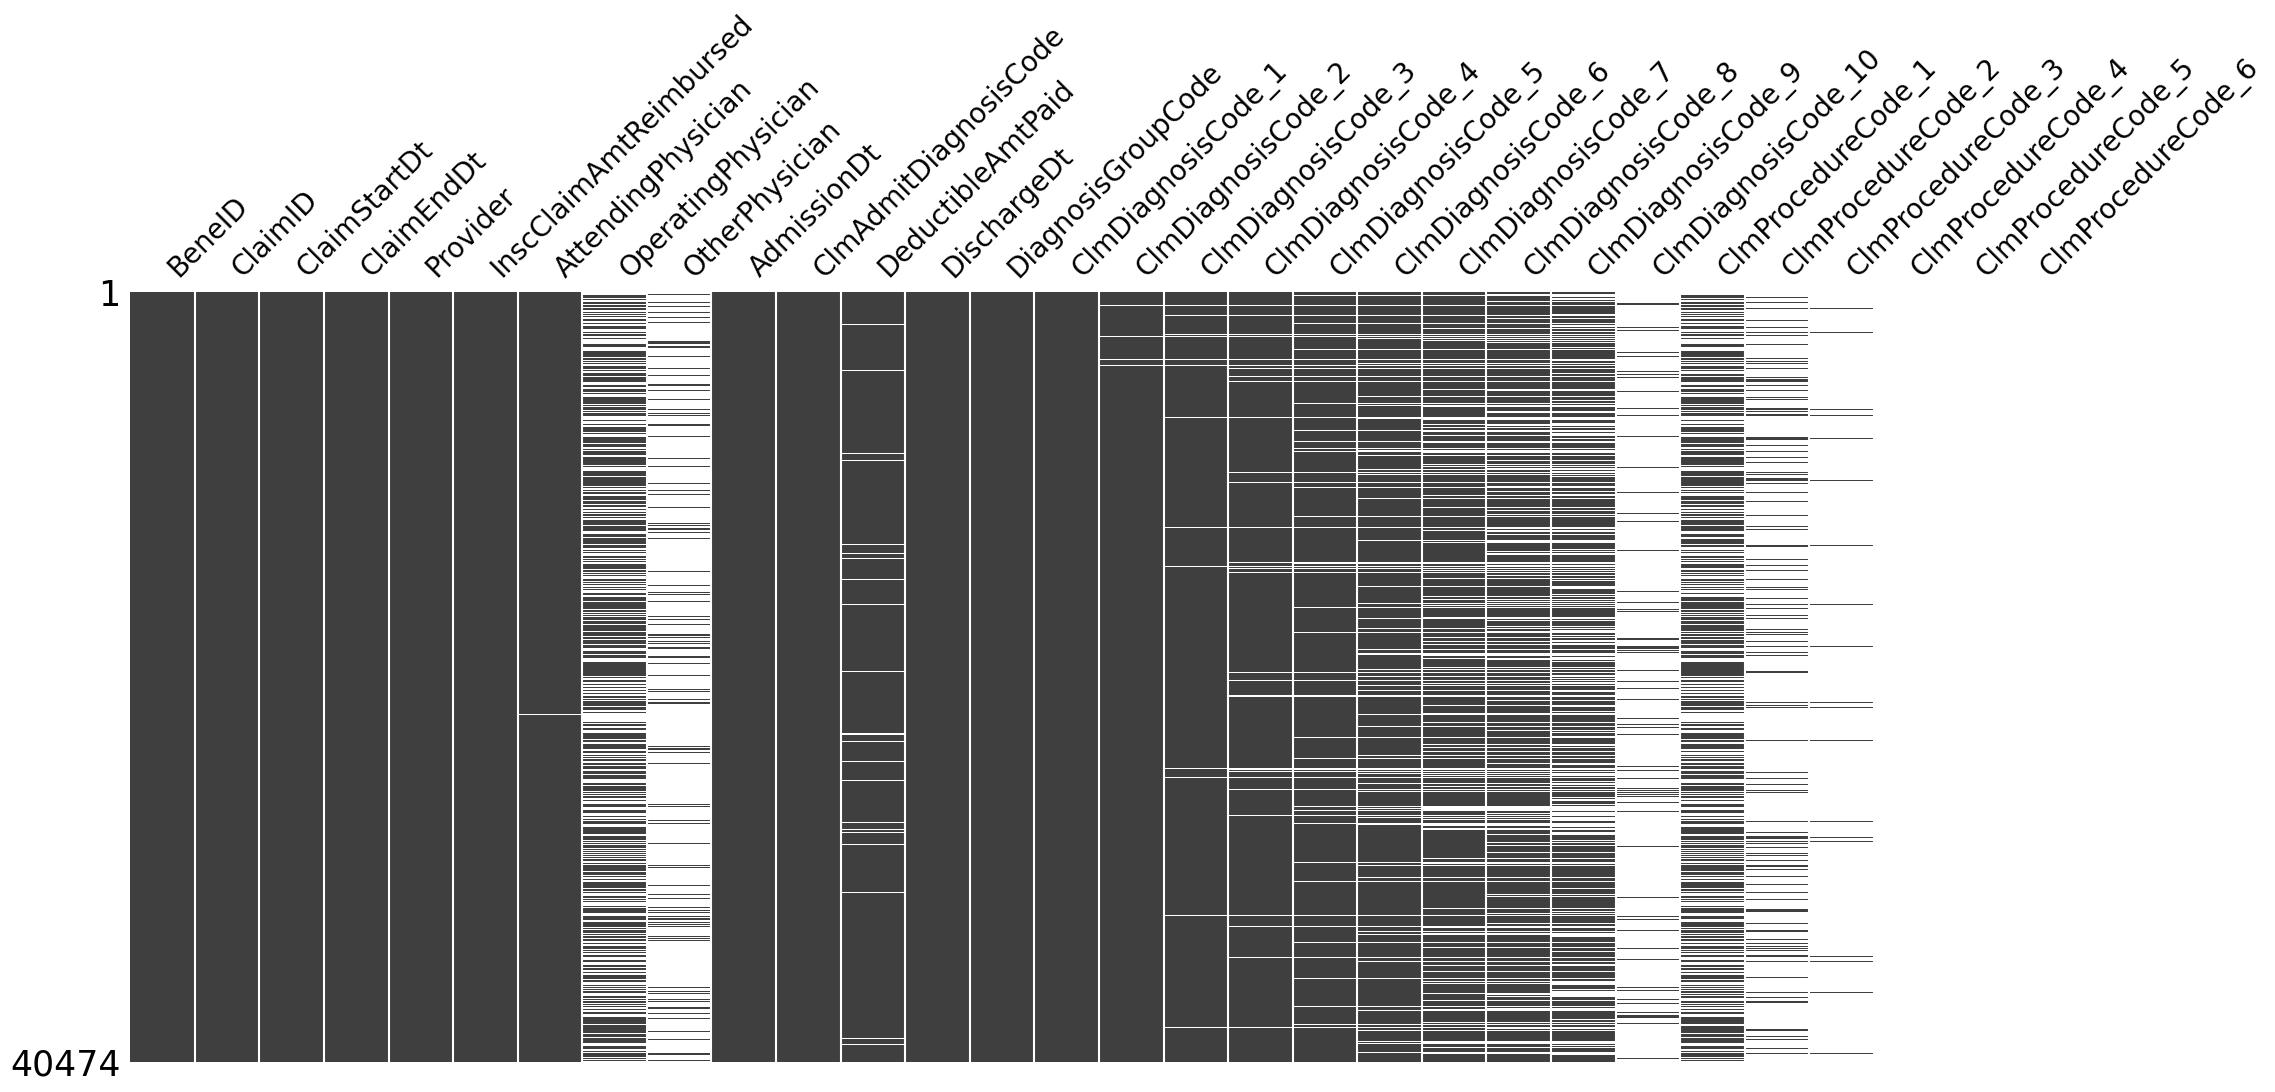

In [4]:
msno.matrix(trainInpatient, sparkline=False, fontsize=20)
plt.show()

In [5]:
print(f"trainInpatient data shape is: {trainInpatient.shape}")
trainInpatient.columns

trainInpatient data shape is: (40474, 30)


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [6]:
trainInpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [7]:
# check for missing values
# and making sure the data types are relevant to the values inside the columns
trainInpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [8]:
# For the DiagnosisGroupCode I wanted to convert the datadtype into int,
# but I have one value as "OTH", I'll convert it to 999999.
trainInpatient['DiagnosisGroupCode'].unique()

array(['201', '750', '883', '067', '975', '597', '390', '379', '294',
       '262', '857', '876', '030', '202', '165', '482', '882', '226',
       '627', '346', '167', '853', '247', '198', '688', '175', '240',
       '206', '500', '712', '897', '101', '307', '255', '183', '302',
       '190', '884', '655', '368', '548', '186', '256', '216', '535',
       '166', '095', '022', '986', '357', '637', '102', '630', '409',
       '316', '241', '230', '208', '541', '624', '869', '698', '653',
       '440', '575', '654', '381', '288', '344', '663', '187', '306',
       '225', '093', '184', '078', '895', '337', '197', '872', '199',
       '281', '200', '871', '887', '351', '643', '289', '094', '592',
       '295', '484', '242', '618', '485', '290', '673', '421', '909',
       '229', '308', '453', '638', '454', '840', '558', '377', '940',
       '259', '311', '231', '461', '951', '303', '714', '446', '207',
       '356', '867', '434', '620', '180', '866', '553', '205', '561',
       '194', '031',

In [9]:
trainInpatient['DiagnosisGroupCode'] = trainInpatient['DiagnosisGroupCode'].replace('OTH', 999999)
trainInpatient['DiagnosisGroupCode'] = trainInpatient['DiagnosisGroupCode'].astype(int)
trainInpatient['DiagnosisGroupCode'].value_counts().reset_index().sort_values(ascending=False, by='DiagnosisGroupCode')

,DiagnosisGroupCode,count
81,999999,113
569,999,20
559,998,23
563,989,22
549,988,25
...,...,...
624,4,14
576,3,19
580,2,18
665,1,10


In [10]:
# convert all relevant columns to datetime for later analysis
trainInpatient['ClaimStartDt']= pd.to_datetime(trainInpatient['ClaimStartDt'])
trainInpatient['ClaimEndDt']  = pd.to_datetime(trainInpatient['ClaimEndDt'])
trainInpatient['AdmissionDt'] = pd.to_datetime(trainInpatient['AdmissionDt'])
trainInpatient['DischargeDt'] = pd.to_datetime(trainInpatient['DischargeDt'])
trainInpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

<center>load the <b>trainOutpatient</b> file, print out the shape and column names</center>

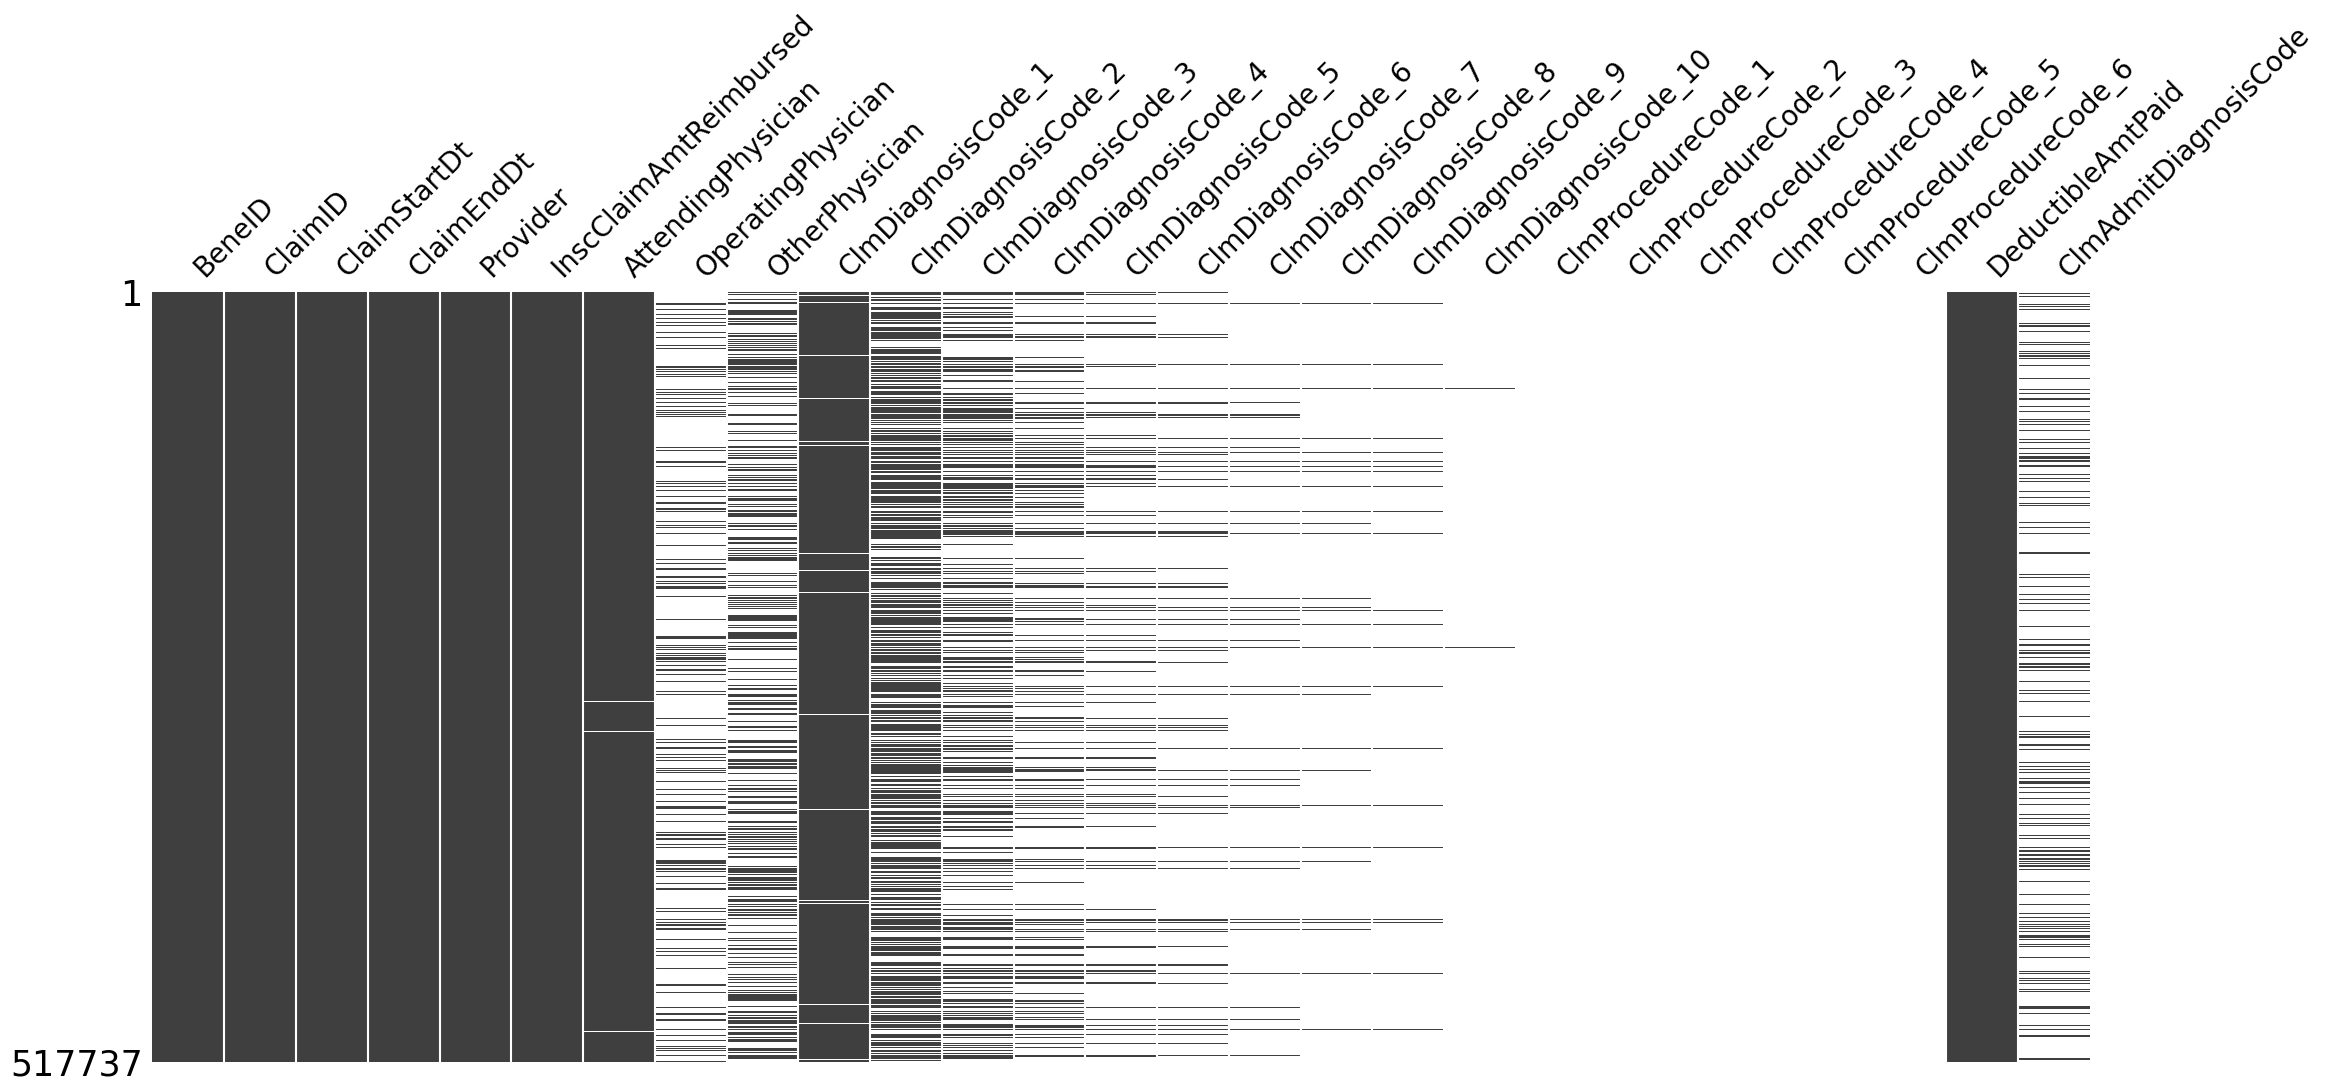

In [11]:
msno.matrix(trainOutpatient, sparkline=False, fontsize=20)
plt.show()

In [12]:
print(f"trainOutpatient data shape is: {trainOutpatient.shape}")
trainOutpatient.columns

trainOutpatient data shape is: (517737, 27)


Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [13]:
trainOutpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [14]:
# check for missing values
# and making sure the data types are relevant to the values inside the columns
trainOutpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [15]:
# convert dates to datetime format 
trainOutpatient['ClaimStartDt'] = pd.to_datetime(trainOutpatient['ClaimStartDt'])
trainOutpatient['ClaimEndDt']   = pd.to_datetime(trainOutpatient['ClaimEndDt'])
trainOutpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BeneID                  517737 non-null  object        
 1   ClaimID                 517737 non-null  object        
 2   ClaimStartDt            517737 non-null  datetime64[ns]
 3   ClaimEndDt              517737 non-null  datetime64[ns]
 4   Provider                517737 non-null  object        
 5   InscClaimAmtReimbursed  517737 non-null  int64         
 6   AttendingPhysician      516341 non-null  object        
 7   OperatingPhysician      90617 non-null   object        
 8   OtherPhysician          195046 non-null  object        
 9   ClmDiagnosisCode_1      507284 non-null  object        
 10  ClmDiagnosisCode_2      322357 non-null  object        
 11  ClmDiagnosisCode_3      203257 non-null  object        
 12  ClmDiagnosisCode_4      125596

<center>load the <b>trainFile</b> file, print out the shape and column names</center>

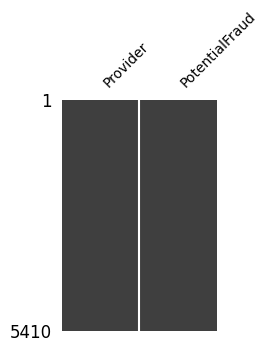

In [16]:
msno.matrix(trainFile, sparkline=False, figsize=(2,3),fontsize=10)
plt.show()

In [17]:
print(f"trainFile data shape is: {trainFile.shape}")
trainFile.columns

trainFile data shape is: (5410, 2)


Index(['Provider', 'PotentialFraud'], dtype='object')

* merge the two files on as many "same column" I can find to create the best merged dataframe
* Create merged_InOutpatient dataframe

In [18]:
merged_InOutpatient = pd.merge(trainInpatient, trainOutpatient, 
         left_on = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
        right_on = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'], 
        how='outer'
)

In [19]:
print(f"merged_InOutpatient data shape is: {merged_InOutpatient.shape}")
merged_InOutpatient.head()

merged_InOutpatient data shape is: (558211, 30)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,NaT,NaN,0.0,NaT,NaN,79678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,NaN,0.0,NaT,NaN,71656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,NaT,64880,0.0,NaT,NaN,64881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,NaT,36401,0.0,NaT,NaN,36401,V4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,NaT,78009,0.0,NaT,NaN,2948,4019,2989,78054,2875,78830,71596,V1251,7993,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <center>  Merge Inpatient and train file into one dataframe </center>

In [20]:
trainInpatient.shape, trainFile.shape

((40474, 30), (5410, 2))

In [21]:
InpatientAndTrain = trainInpatient.merge(trainFile, on='Provider', how='left')
InpatientAndTrain.shape

(40474, 31)

In [22]:
# I want to claculate the length of Hospitalization
InpatientAndTrain['Hospitalization'] = InpatientAndTrain['DischargeDt'] - InpatientAndTrain['AdmissionDt']
InpatientAndTrain['Hospitalization'] = InpatientAndTrain['Hospitalization'].dt.days

In [23]:
InpatientAndTrain.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,Hospitalization
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,No,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,67,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,No,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,No,17


In [24]:
InpatientAndTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  datetime64[ns]
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeDt             40474 non-null  dateti

<Axes: xlabel='InscClaimAmtReimbursed', ylabel='Hospitalization'>

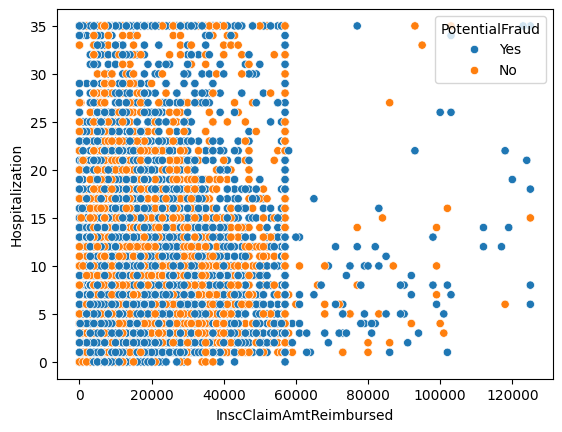

In [27]:
# group the providers by potential fraud to check the disribution 
test1 = InpatientAndTrain.groupby('Provider')[['PotentialFraud','InscClaimAmtReimbursed','Hospitalization']].value_counts().reset_index().sort_values(ascending=False, by='count')
sns.scatterplot(data=test1,
                x='InscClaimAmtReimbursed',
                y='Hospitalization',
                hue='PotentialFraud')

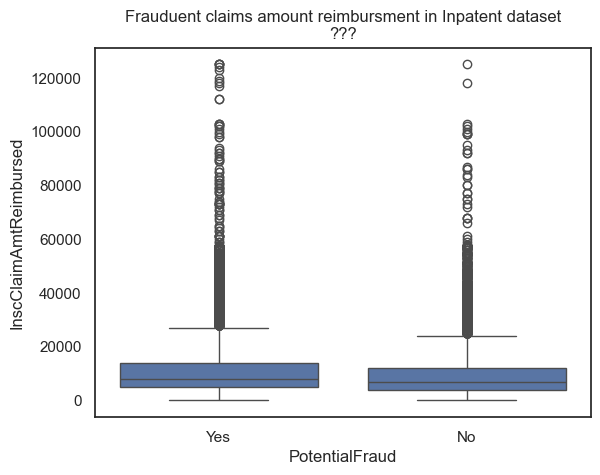

In [35]:
# test1.plot(kind='box',y='InscClaimAmtReimbursed',x='PotentialFraud')
sns.set_theme(style='white')
sns.boxplot(x=test1['PotentialFraud'], 
           y=test1['InscClaimAmtReimbursed'])
plt.title('Frauduent claims amount reimbursment in Inpatent dataset\n???')
plt.show()

In [ ]:
plt.bar()

In [41]:
test2 = InpatientAndTrain.groupby('Provider')['PotentialFraud'].value_counts().reset_index().sort_values(ascending=False, by='count')
test2

,Provider,PotentialFraud,count
388,PRV52019,Yes,516
1408,PRV55462,Yes,386
1066,PRV54367,Yes,322
896,PRV53706,Yes,282
1355,PRV55209,Yes,275
...,...,...,...
862,PRV53515,No,1
863,PRV53516,No,1
871,PRV53600,No,1
1703,PRV56474,No,1


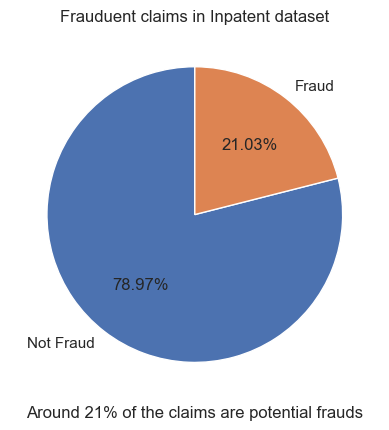

In [40]:
plt.pie(test2['PotentialFraud'].value_counts(),
        labels=['Not Fraud', 'Fraud'],
        autopct='%1.2f%%',
        startangle=90
        )
plt.title('Frauduent claims in Inpatent dataset')
plt.xlabel('Around 21% of the claims are potential frauds')
plt.show()

------------------------

In [54]:
InpatientAndTrain.sample()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud,Hospitalization
4453,BENE26956,CLM73761,2009-10-28,2009-11-12,PRV54705,9000,PHY312495,PHY312495,NaN,2009-10-28,51881,1068.0,2009-11-12,444,5712,0389,5859,29680,03849,V5869,53540,2761,78959,NaN,5491.0,NaN,NaN,NaN,NaN,NaN,No,15


In [56]:
InpatientAndTrain.groupby('Provider')['AttendingPhysician'].value_counts().reset_index()

,Provider,AttendingPhysician,count
0,PRV51001,PHY383193,2
1,PRV51001,PHY340163,1
2,PRV51001,PHY346762,1
3,PRV51001,PHY402229,1
4,PRV51003,PHY364445,31
...,...,...,...
11799,PRV57729,PHY415588,1
11800,PRV57729,PHY423194,1
11801,PRV57732,PHY411372,6
11802,PRV57732,PHY340707,5


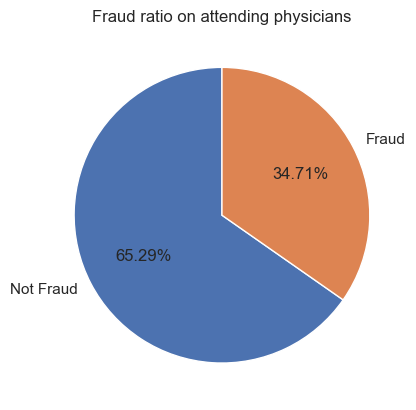

In [70]:
attending_test2 = InpatientAndTrain.groupby('AttendingPhysician')['PotentialFraud'].value_counts().reset_index()
plt.pie(attending_test2['PotentialFraud'].value_counts(),
        labels=['Not Fraud', 'Fraud'],
        autopct='%1.2f%%',
        startangle=90
        )
plt.title('Fraud ratio on attending physicians')
plt.show()


In [71]:
attending_test2

,AttendingPhysician,PotentialFraud,count
0,PHY311002,Yes,1
1,PHY311023,No,1
2,PHY311028,Yes,1
3,PHY311035,No,1
4,PHY311056,No,1
...,...,...,...
11670,PHY434121,No,1
11671,PHY434136,No,1
11672,PHY434139,No,1
11673,PHY434142,Yes,1
